

1.   Import Package
2.   Data Cleaning and processing
3.   Word Embedding (Word2Vec)
2.   Implemented LSTM
2.   Implement BiLSTM


In [ ]:
#install libraries
!pip install bnlp
!pip install bnlp_toolkit
!pip install --upgrade bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32825 sha256=91d1090db0116e964fe59e2433640ac56c8715ed2fc6f08dde3989769bde6957
  Stored in directory: /root/.cache/pip/wheels/64/c7/7e/272284eb8c800fbb5306bdf7904ae9f99a64812fc615f471b2
Successfully built bnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 61.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=db5513ebb436a6c06a7d2b2ebf1b57b0f16e84f1

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import random
import re, string
import seaborn as sns
import matplotlib.pyplot as plt

from string import punctuation
from bnlp import BasicTokenizer
from bnlp import NLTKTokenizer
from bnlp import SentencepieceTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus.util import remove_stopwords
from bnlp import BengaliWord2Vec

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

import gensim
from gensim.models import Word2Vec, FastText

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<ipython-input-3-4edda087e305>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

## Define Performance Metrics & Confusion Matrix 

In [ ]:
# Calculate performance metrics
def perf_matrix(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 Score:', f1)

# Plot confusion matrix
def conf_matrix(y_test, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", fmt='g', cbar=True, annot_kws={"size":20})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/Colab Notebooks/Thesis Project/

/content/drive/MyDrive/Colab Notebooks/Thesis Project


In [ ]:
!ls


'0. Depression Analysis Dataset.xlsx'
'1. Depression Analysis Dataset Cleaned v1.xlsx'
'1. Depression Analysis Dataset Cleaned v2.xlsx'
'1. Depression Analysis Dataset Cleaned v3.xlsx'
'1. Depression Analysis v1.ipynb'
'2.1 Depression Analysis v2 (Previous code).ipynb'
'2.2 Depression Analysis v2.ipynb'
'2.3 Depression Analysis v2 modified.ipynb'
'3.1 Depression_Analysis_v3.ipynb'
'3.2 Depression_Analysis_v3 (FastText).ipynb'
'4. Depression_Analysis (Hyperparameter Tuning).ipynb'
 corpus.txt
 model_GRU.pth
 state_dict.pt


In [ ]:
df = pd.read_excel('1. Depression Analysis Dataset Cleaned v2.xlsx')

print(df.info())
print("")
print(df.label.value_counts())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17950 entries, 0 to 17949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17950 non-null  object
 1   label   17950 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 280.6+ KB
None

1    8975
0    8975
Name: label, dtype: int64


,text,label
0,বয়সী বয়স বিষণ্নতায় গভীরভাবে বেড়ে উঠেছি। কঠ...,1
1,তুরস্কে বসবাসকারী একজন। বয়স সম্ভবত কম। পোস্ট ...,1
2,কিছুক্ষণ ঘটেছিল বিরক্ত সাহায্য কথা নোংরা করেছে...,1
3,পুরো জীবন মাসে স্বতঃস্ফূর্তভাবে জ্বলে উঠেছে। ব...,1
4,শীঘ্রই বয়সী। মুহুর্তে সিডি সামাজিক জীবনে বড় ...,1
5,মানসিক শারীরিকভাবে অসুস্থ ক্লান্ত। পুরো জীবন শ...,1
6,জানতাম সাথে ভুল ছিল। লোক খারাপ জীবন কাটিয়েছে ...,1
7,দয়া সাথে থাকুন অত্যন্ত দীর্ঘ আপনাকে পড়তে উত্...,1
8,অনেটিভ ইংরেজি স্পিকারের অনুসরণ বিরক্তিকর অপ্রত...,1
9,দৈর্ঘ্যের ক্ষমাপ্রার্থী। বোঝানোর বের আলিঙ্গন ব...,1


# Train Test Split

In [ ]:
# shuffle the rows
df = df.sample(frac=1)
df.head(10)

,text,label
2238,ধন্যবাদ বাবা সত্যিকার অর্থে উৎসাহজনক কথাগুলো প...,1
243,নস্টালজিয়া অনুগ্রহ অনুভূতিটি পড়ুন। একটা চিন্...,0
1689,আসলেই অপরকে ভালবাসে পরিবারের লোকদের ঈর্ষান্বিত...,1
6080,সত্যিই দুর্দান্ত আক্ষরিক অর্থে একা থাকতে আশা ম...,1
2018,সহপাঠীরা সত্যিই যত্ন করছিলাম জটিল সার্কিট ব্যা...,0
4174,মানসিক অসুস্থতা আত্মহত্যার চিন্তাভাবনা কিছুর দ...,1
13966,সন্তান তৈরি অর্থ সম্মানের যোগ্য ট্রান্স হওয়াক...,0
7254,মারা যেতাম। তৈরি পারতাম না। সবে গাইতে পারতাম। ...,1
8297,গেমের সুপারিশ পেয়েছি প্রিয় গেমস আন্ডারটেল ডে...,0
5984,সবসময় ধরনের উচ্চ মান অধিষ্ঠিত জিএফ প্রতারণা শ...,1


In [ ]:
X = df['text']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6462],
       [   1, 6462]])

# Data preprocessing for LSTM

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
max_len = 5000

In [ ]:
vocabulary, tokenized_column = Tokenize(df["text"], max_len)

In [ ]:
vocabulary[:20]

[('সাথে', 24522),
 ('না।', 18631),
 ('চাই', 14293),
 ('কথা', 11425),
 ('জানি', 11052),
 ('করেছি', 10807),
 ('সত্যিই', 9677),
 ('নিজেকে', 8401),
 ('করছি', 8398),
 ('সম্পর্কে', 8236),
 ('সময়', 8117),
 ('খারাপ', 7958),
 ('ভাল', 7829),
 ('অনুভব', 7206),
 ('শেষ', 6788),
 ('সাহায্য', 6154),
 ('জীবন', 6017),
 ('বোধ', 5876),
 ('বন্ধু', 5754),
 ('ছিলাম', 5544)]

In [ ]:
len(vocabulary)

63366

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2469 (\N{BENGALI LETTER THA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/

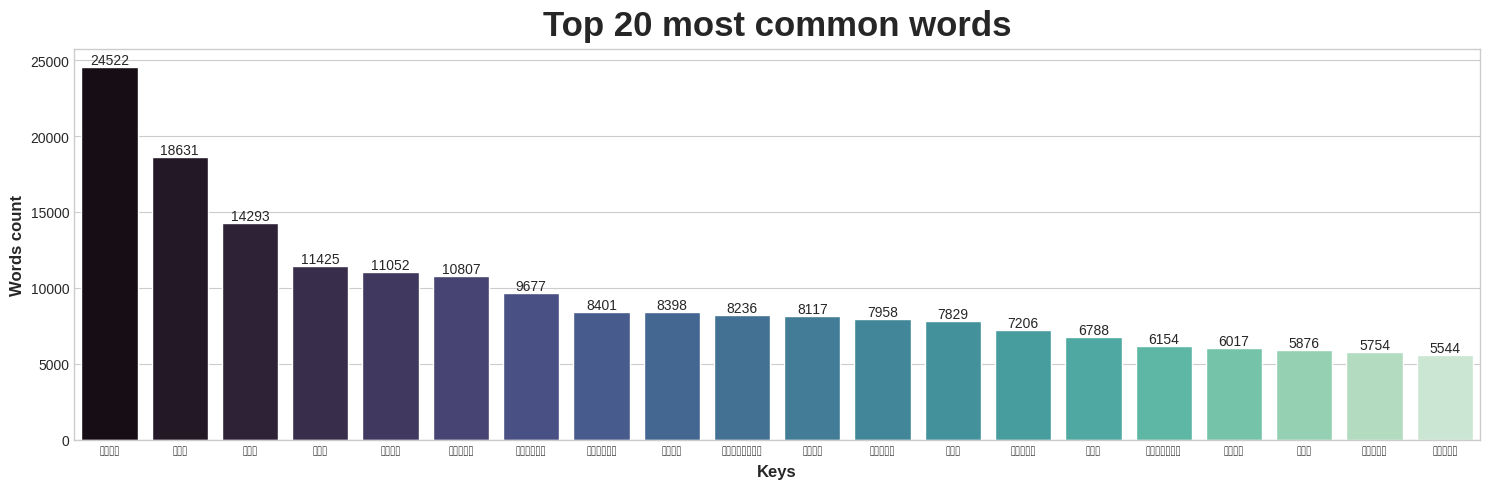

In [ ]:

"""
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

plt.figure(figsize=(15, 5))
# create barplot
ax = sns.barplot(x=keys, y=values, palette='mako')

# set labels
ax.set(xlabel='Keys', ylabel='Values')

plt.title('Top 20 most common words', size=25)
ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()
"""

In [ ]:
tokenized_column[3:6]

array([[    0,     0,     0, ...,   645,   124,  1405],
       [    0,     0,     0, ..., 18998, 18999,   381],
       [    0,     0,     0, ...,   113,   884,    56]])

In [ ]:
df["text"].iloc[10]

'আক্ষরিক অর্থে এটাকে ঘৃণা ব্রুহ বোকা ফাগলি মোটা কুৎসিত গাধা দুশ্চরিত্রা মা আক্ষরিক অর্থে শীতের মাঝখানে হিমায়িত গাধা ঝরনা বাধ্য করেনি তর্কের পড়েছিলাম সংরক্ষণ বলেছিলাম আক্ষরিকভাবে শেষ করেছি ফ্যাটাস আক্ষরিকভাবে স্নান অপেক্ষা পারেনি ইতিমধ্যেই আজকে গ্রহণ করেনি৷ কুৎসিত মোটা গাধা কদর্য খসখসে কুত্তার আক্ষরিক অর্থে ঘন্টা সময় লাগে ঝরনাটি সম্পূর্ণরূপে জেনেও সাহস আগামীকাল চলেছে বেরিয়ে এসেছি করেছিলাম কেমন নোংরা ঘামে ঘুমানোর কথা তর্ক করেছি আক্ষরিক অর্থে কুত্তাকে বলেছিলাম জানত স্নান গৃহস্থালির স্নান প্রয়োজন মুখের দুজনেই অন্যকে পছন্দ বোকা দুশ্চরিত্রা ফোন ফোনের বিল পরিশোধ কুত্তা বাবা বিল হস্তান্তর এমনকি গন্ধযুক্ত কাকা গন্ধযুক্ত হাত স্পর্শ আক্ষরিক অর্থে বোকা দুশ্চরিত্রা কথা বলছে কীভাবে মা চাননি সম্মান দেখাতে আপনাকে দেখাব চিকেন মোরগ আলগা গাধা ঘাড় চিবুক চর্বি স্থির কুশ্রী দুশ্চরিত্রা পেতে যৌনসঙ্গম শ্রদ্ধা যাই আক্ষরিক হিমায়িত ঝরনা বেরিয়ে এলাম বাজে হলুদ আঁকাবাঁকা দাঁতের সাথে মুখে কুৎসিত গাধা হাসি ছিল। রান্ট ওভার'

In [ ]:
tokenized_column[10]

array([   0,    0,    0, ...,   47, 4148, 4282])

# Word Embedding by Word2Vec

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
EMBEDDING_DIM = 200

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [ ]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 63367


In [ ]:
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding
VOCAB_SIZE

63367

In [ ]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (63367, 200)


## Train - Validation - Test split

In [ ]:
df.head(10)

,text,label
2238,ধন্যবাদ বাবা সত্যিকার অর্থে উৎসাহজনক কথাগুলো প...,1
243,নস্টালজিয়া অনুগ্রহ অনুভূতিটি পড়ুন। একটা চিন্...,0
1689,আসলেই অপরকে ভালবাসে পরিবারের লোকদের ঈর্ষান্বিত...,1
6080,সত্যিই দুর্দান্ত আক্ষরিক অর্থে একা থাকতে আশা ম...,1
2018,সহপাঠীরা সত্যিই যত্ন করছিলাম জটিল সার্কিট ব্যা...,0
4174,মানসিক অসুস্থতা আত্মহত্যার চিন্তাভাবনা কিছুর দ...,1
13966,সন্তান তৈরি অর্থ সম্মানের যোগ্য ট্রান্স হওয়াক...,0
7254,মারা যেতাম। তৈরি পারতাম না। সবে গাইতে পারতাম। ...,1
8297,গেমের সুপারিশ পেয়েছি প্রিয় গেমস আন্ডারটেল ডে...,0
5984,সবসময় ধরনের উচ্চ মান অধিষ্ঠিত জিএফ প্রতারণা শ...,1


In [ ]:
X = tokenized_column
y = df['label'].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6462],
       [   1, 6462]])

# PyTorch datasets and dataloaders

In [ ]:
BATCH_SIZE = 8
EPOCHS = 5 #Number of training epoch
LR = 0.003 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
WEIGHT_DECAY = 0.001
LSTM_LAYERS = 1 #Number of stacked LSTM layers
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)

NUM_CLASSES = 2 #We are dealing with a multiclass classification of 2 classes
BIDIRECTIONAL = False #Boolean value to choose if to use a bidirectional LSTM or not

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

## PyTorch LSTM modeling

In [ ]:
class LSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(LSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = LSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


LSTM_Sentiment_Classifier(
  (embedding): Embedding(63367, 200)
  (lstm): LSTM(200, 100, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=100, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = WEIGHT_DECAY)

### LSTM Training loop 

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 88.966480).  Saving model ...
	Train_loss : 0.3897 Val_loss : 0.2891
	Train_acc : 82.531% Val_acc : 88.966%
Epoch 2:Validation accuracy did not increase
	Train_loss : 0.1316 Val_loss : 0.3328
	Train_acc : 95.217% Val_acc : 87.081%
Epoch 3:Validation accuracy did not increase
	Train_loss : 0.0457 Val_loss : 0.4842
	Train_acc : 98.622% Val_acc : 85.964%
Epoch 4:Validation accuracy did not increase
	Train_loss : 0.0177 Val_loss : 0.5677
	Train_acc : 99.458% Val_acc : 85.824%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.0086 Val_loss : 0.8127
	Train_acc : 99.768% Val_acc : 83.170%


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

### LSTM Testing

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
label = ['0', '1']

In [ ]:
print('Classification Report for LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=label))

In [ ]:
perf_matrix(y_test_list, y_pred_list)
conf_matrix(y_test_list,y_pred_list,'PyTorch LSTM Sentiment Analysis\nConfusion Matrix', label)

## PyTorch BiLSTM modeling

In [ ]:
NUM_CLASSES = 2 #We are dealing with a multiclass classification of 2 classes
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(63229, 200)
  (lstm): LSTM(200, 100, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=200, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = WEIGHT_DECAY)

### BiLSTM Training loop 

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 87.569832).  Saving model ...
	Train_loss : 0.4785 Val_loss : 0.3019
	Train_acc : 75.797% Val_acc : 87.570%
Epoch 2:Validation accuracy increased (87.569832 --> 89.175978).  Saving model ...
	Train_loss : 0.2225 Val_loss : 0.2726
	Train_acc : 91.718% Val_acc : 89.176%
Epoch 3:Validation accuracy did not increase
	Train_loss : 0.1256 Val_loss : 0.3528
	Train_acc : 95.820% Val_acc : 88.897%
Epoch 4:Validation accuracy did not increase
	Train_loss : 0.0696 Val_loss : 0.3761
	Train_acc : 97.810% Val_acc : 88.268%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.0346 Val_loss : 0.4832
	Train_acc : 98.971% Val_acc : 86.453%


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

### BiLSTM Testing

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
label = ['0','1']

In [ ]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=label))

Classification Report for Bi-LSTM :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1792
           1       0.87      0.91      0.89      1792

    accuracy                           0.88      3584
   macro avg       0.88      0.88      0.88      3584
weighted avg       0.88      0.88      0.88      3584



Accuracy: 0.8842075892857143
Precision: 0.8849941788677453
Recall: 0.8842075892857143
F1 Score: 0.8841484145922086


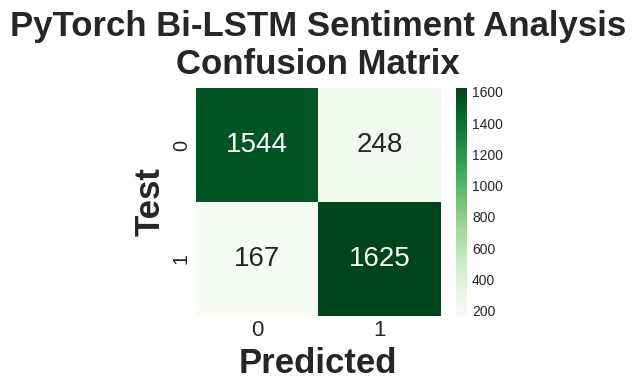

In [ ]:
perf_matrix(y_test_list, y_pred_list)
# conf_matrix(y_test_list,y_pred_list,'PyTorch Bi-LSTM Sentiment Analysis\nConfusion Matrix', label)

# Bayesian Optimization